# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [3]:
import numpy as np

### Simulation du lancé de dé

In [4]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [5]:
Roll()

4

### Compléter le code et commenter

In [6]:
A=0 #POSITION DU PION
NA=0 #nb de coup
S=10 #longeur du chemin n
temp= Roll()
NA += 1
print ('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
while temp<6 :
        temp=Roll()
        NA=NA+1
        print ('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
A=1 
print ('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
while A<S :
    temp=Roll()
    if A+temp==S :
        NA=NA+1
        A=S
        print ('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
        break
    elif temp+A<S :
        A=A+temp
        NA=NA+1
        print ('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
    else : 
        NA+=1
        print ('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
        

temp = 3 | NA = 1 | A = 0
temp = 2 | NA = 2 | A = 0
temp = 2 | NA = 3 | A = 0
temp = 6 | NA = 4 | A = 0
temp = 6 | NA = 4 | A = 1
temp = 3 | NA = 5 | A = 4
temp = 3 | NA = 6 | A = 7
temp = 5 | NA = 7 | A = 7
temp = 5 | NA = 8 | A = 7
temp = 2 | NA = 9 | A = 9
temp = 4 | NA = 10 | A = 9
temp = 1 | NA = 11 | A = 10


In [ ]:

# A : represente la position de pion  . 
# NA : represente le nombre de coups . 
# S : initialiser a 10 car la distance entre le prison et la destination est egale a 10 .
# il faut avoir une valeur de dé = 6 pour avancer a la position 1 apres on lance le dés jusqua le pion atteint le cible

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [7]:
def sim(S):
    A=0 #POSITION DU PION
    NA=0 #nb de coup
    temp= Roll()
    NA += 1
    while temp<6 :
            temp=Roll()
            NA=NA+1
    A=1 
    while A<S :
        temp=Roll()
        NA=NA+1
        if A+temp==S :

            A=S
            break
        elif temp+A<S :
            A=A+temp
        else : 
            continue
    return NA


In [8]:
[sim(2) for i in range(5)]

[20, 7, 9, 3, 8]

### Simulation de $10^5$  scénario 

In [9]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [10]:
ESP=Freq.sum()/10**5

In [11]:
x=list(range(10,20))

In [12]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [13]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


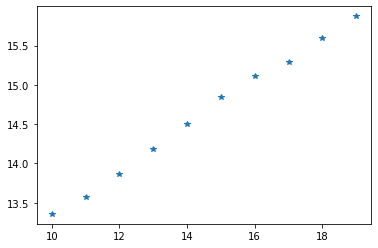

In [14]:
plt.plot(x,y,'*')

In [15]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [16]:
slope

0.28514763636363644

In [17]:
intercept


10.485731272727271

In [18]:
yy=[slope*u+intercept for u in x]

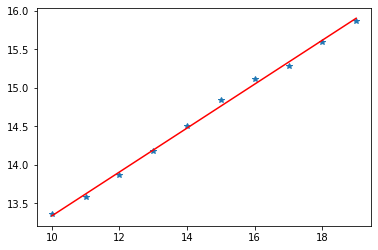

In [19]:
plt.plot(x,y,'*',x,yy,'r-')

In [22]:
#on a fait le graphe du jeu ludo dans le cas d''un jeu non truqué et on a constaté que le jeu est une fonction linéaire
